# Precipitation Service



In [28]:
from datetime import datetime, timedelta

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import polars as pl

from synoptic.services import Precipitation

## Daily Precipitation

Let's get the daily precipitation at a single station for August 2024 and plot the daily accumulation with a running total for the month.

In [44]:
df = Precipitation(
    stid="wbb",
    start=datetime(2024, 8, 1),
    end=datetime(2024, 9, 1),
    pmode="intervals",
    units="english",
    interval="day",
).df

# Calculate cumulative precipitation for the time period
df = df.with_columns(cum_sum=pl.col("total").cum_sum())
df

🚚💨 Speedy delivery from Synoptic precipitation service.
📦 Received data from 1 stations.


total,first_report,last_report,count,interval,report_type,units,id,stid,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record,is_restricted,is_active,cum_sum
f64,"datetime[μs, UTC]","datetime[μs, UTC]",i64,i64,str,str,u32,str,str,f64,f64,f64,u32,str,str,f64,struct[2],bool,bool,f64
0.0,2024-08-01 00:00:00 UTC,2024-08-02 00:00:00 UTC,1440,1,"""precip_accum_one_minute""","""Inches""",1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,"{""1997-01-01T00:00:00Z"",""2024-09-26T04:55:00Z""}",false,true,0.0
0.0,2024-08-02 00:00:00 UTC,2024-08-03 00:00:00 UTC,1440,2,"""precip_accum_one_minute""","""Inches""",1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,"{""1997-01-01T00:00:00Z"",""2024-09-26T04:55:00Z""}",false,true,0.0
0.0,2024-08-03 00:00:00 UTC,2024-08-04 00:00:00 UTC,1440,3,"""precip_accum_one_minute""","""Inches""",1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,"{""1997-01-01T00:00:00Z"",""2024-09-26T04:55:00Z""}",false,true,0.0
0.0,2024-08-04 00:00:00 UTC,2024-08-05 00:00:00 UTC,1440,4,"""precip_accum_one_minute""","""Inches""",1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,"{""1997-01-01T00:00:00Z"",""2024-09-26T04:55:00Z""}",false,true,0.0
0.0,2024-08-05 00:00:00 UTC,2024-08-06 00:00:00 UTC,1440,5,"""precip_accum_one_minute""","""Inches""",1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,"{""1997-01-01T00:00:00Z"",""2024-09-26T04:55:00Z""}",false,true,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,2024-08-27 00:00:00 UTC,2024-08-28 00:00:00 UTC,1440,27,"""precip_accum_one_minute""","""Inches""",1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,"{""1997-01-01T00:00:00Z"",""2024-09-26T04:55:00Z""}",false,true,1.15
0.0,2024-08-28 00:00:00 UTC,2024-08-29 00:00:00 UTC,1406,28,"""precip_accum_one_minute""","""Inches""",1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,"{""1997-01-01T00:00:00Z"",""2024-09-26T04:55:00Z""}",false,true,1.15
0.0,2024-08-29 00:00:00 UTC,2024-08-30 00:00:00 UTC,1440,29,"""precip_accum_one_minute""","""Inches""",1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,"{""1997-01-01T00:00:00Z"",""2024-09-26T04:55:00Z""}",false,true,1.15


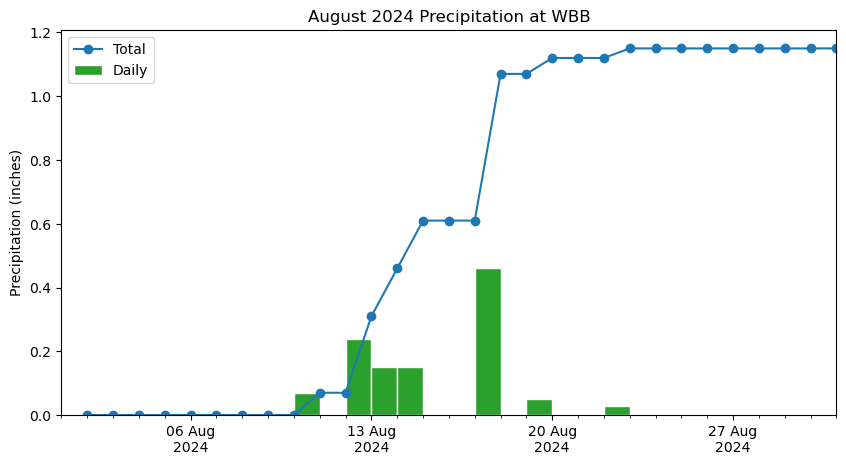

In [49]:
plt.figure(figsize=(10, 5))
ax = plt.gca()

ax.plot(df["last_report"], df["cum_sum"], marker="o", label="Total")
ax.bar(
    df["first_report"],
    df["total"],
    width=timedelta(days=1),
    align="edge",
    edgecolor="w",
    color="tab:green",
    label="Daily",
)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b\n%Y"))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(1))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.set_xlim(df["first_report"].min(), df["first_report"].max())

# ---------
# Cosmetics
ax.set_ylabel("Precipitation (inches)")
ax.set_title("August 2024 Precipitation at WBB")
ax.legend()